In [8]:
import pandas as pd
from sklearn.cluster import MeanShift
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv('../inputs/candy.csv')
X = dataset.drop('competitorname', axis=1)
meanshift = MeanShift(bandwidth=None)
meanshift.fit(X)
print(meanshift.labels_)

[2 2 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 2 1 2 0 1 2 0 0 1 2 2 0 1 2
 2 2 1 1 1 2 2 0 0 0 2 0 0 0 2 2 2 2 0 2 0 0 0 2 1 0 0 2 2 2 1 2 0 0 0 0 1
 1 0 0 1 1 2 0 0 0 0 1]


In [5]:
print(max(meanshift.labels_))
print('=' * 64)
# Imprimamos la ubicación de los centros que puso sobre nuestros datos.
# Hay que recordar que estos algoritmos crean un centro y
# a partir de ahí se ajustan a todos los datos que lo rodean
print(meanshift.cluster_centers_)

2
[[2.25000000e-01 5.75000000e-01 1.00000000e-01 2.50000000e-02
  5.00000000e-02 2.50000000e-02 3.00000000e-01 1.00000000e-01
  5.50000000e-01 4.57599993e-01 3.67824996e-01 4.10442122e+01]
 [4.68750000e-01 5.00000000e-01 1.25000000e-01 1.56250000e-01
  9.37500000e-02 6.25000000e-02 1.25000000e-01 3.12500000e-01
  5.31250000e-01 4.57281243e-01 4.67874998e-01 5.21138597e+01]
 [8.26086957e-01 1.73913043e-01 3.04347826e-01 3.04347826e-01
  1.73913043e-01 1.73913043e-01 0.00000000e+00 5.21739130e-01
  4.34782609e-01 5.81391293e-01 6.38086963e-01 6.47120799e+01]]


  competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   
3                 0     0    0         0         0.011         0.511   
4                 0     0    0         0         0.906         0.511   

   winpercent  meanshift  
0   66.971725          2  
1   67.602936          2  
2   32.261086          0  
3   46.116505          0  

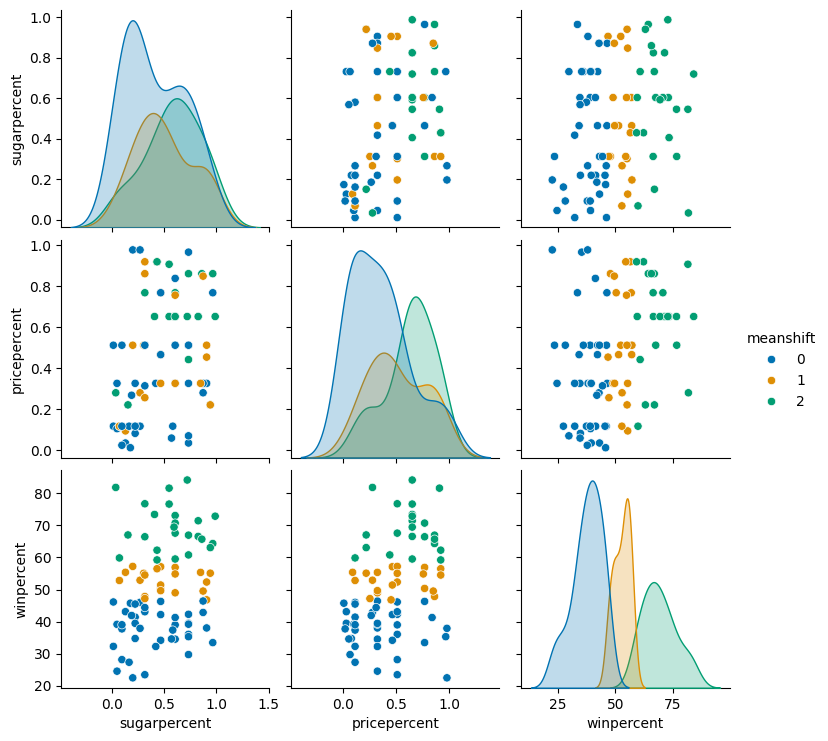

In [6]:
cname = "meanshift"
dataset[cname] = meanshift.labels_
print('=' * 64)
print(dataset.head())
sns.pairplot(dataset[['sugarpercent', 'pricepercent', 'winpercent', cname]], hue=cname, palette='colorblind')
plt.savefig("meanshift.png")
plt.show()

In [ ]:
# Quiero agregar una manera de ver graficamente estos algoritmos de clustering Adjunto el codigo, 
# explico Utilize PCA para tener mi dataset en 2 dimensiones para que me sea facil graficarlo, y con meanshift.cluster_centers_ me devuelven las coordenadas de un centroide, 
# al final bota el grafico de los puntos y como se dividen NOTA: como baje mi dataset a 2 dimensiones supongo que perdi mucha informacion, 
# por eso esto es mas algo ludico para entender mejor lo que hacemos

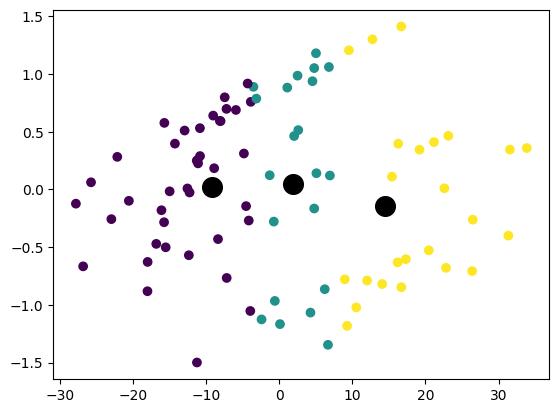

In [9]:
pca = PCA(n_components=2)
pca.fit(X)
pca_data = pca.transform(X)
    
meanshift = MeanShift().fit(pca_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=meanshift.predict(pca_data))
plt.scatter(meanshift.cluster_centers_[:, 0], meanshift.cluster_centers_[:, 1], c='black', s=200)
plt.show()

In [12]:
# Modificacion.

import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(
    x=pca_data[:, 0],
    y=pca_data[:, 1],
    color=meanshift.predict(pca_data))
# Aqui anexamos a la misma figura cada trazo

fig.add_trace(go.Scatter(
    x=meanshift.cluster_centers_[:, 0],
    y=meanshift.cluster_centers_[:, 1],
    mode='markers', marker=dict(size=20,
    color= 'white'), name='Centroides'
))

fig.update_layout(title=f'Visualizacion de centroides sobre PCA de 2 componentes', coloraxis_showscale=False)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed